In [2]:
import pandas as pd
diabetes = pd.read_csv('C:\\Users\\Dell\\Desktop\\diabetes.csv') 
diabetes.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#to check for shape
shape = diabetes.shape
#to check for data types
dt = diabetes.dtypes
#to check for missing values
missing_values = diabetes.isnull().sum() 
shape, dt, missing_values 

((768, 9),
 Pregnancies                   int64
 Glucose                       int64
 BloodPressure                 int64
 SkinThickness                 int64
 Insulin                       int64
 BMI                         float64
 DiabetesPedigreeFunction    float64
 Age                           int64
 Outcome                       int64
 dtype: object,
 Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64)

Text(0.5, 1.02, 'Distribution of Numerical Features')

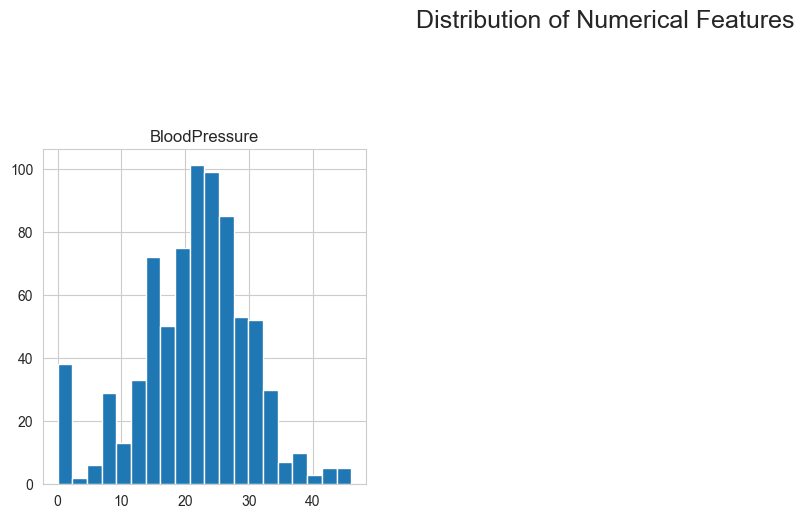

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style('whitegrid')

# List of numerical features
numerical_features = ['BloodPressure'] 

# Plotting histograms for each numerical feature
diabetes[numerical_features].hist(bins=20, figsize=(15, 10), layout=(2, 3));

plt.suptitle('Distribution of Numerical Features', y=1.02, fontsize=18) 

Text(0.5, 1.02, 'Boxplots of Numerical Features')

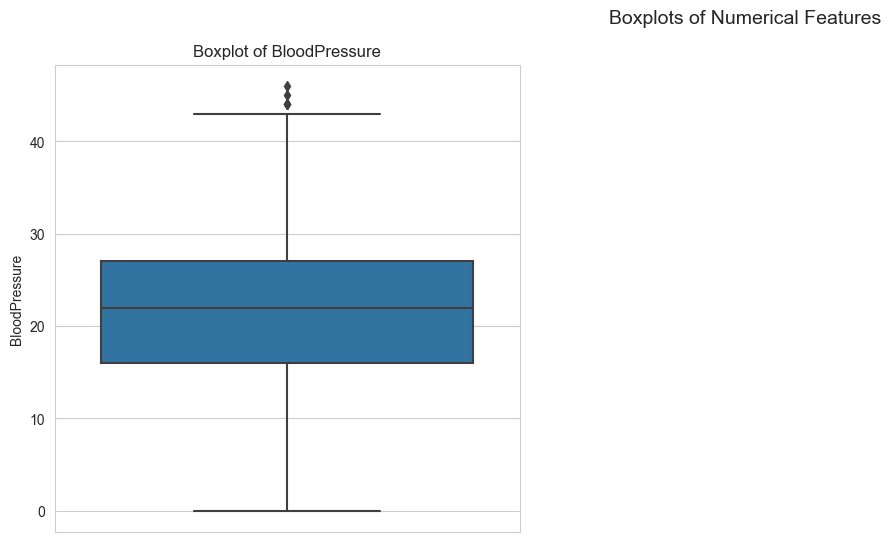

In [19]:
# Plotting boxplots for each numerical feature
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=diabetes[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature) 

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features', y=1.02, fontsize=14) 

Text(0.5, 1.05, 'Distribution of Categorical Features by Outcome')

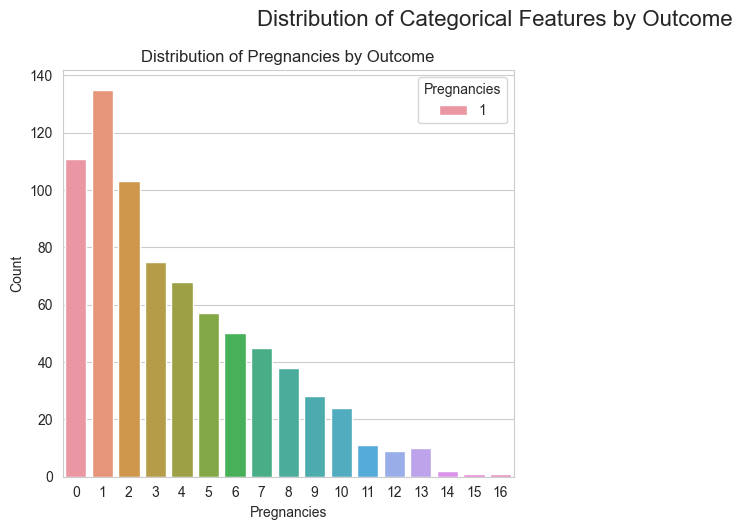

In [17]:
# List of categorical features for analysis
categorical_features = ['Pregnancies']

# Plotting the distribution of each categorical feature
plt.figure(figsize=(10, 5))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=diabetes, x=feature)
    plt.title(f'Distribution of {feature} by Outcome')
    plt.ylabel('Count')
    plt.legend(title='Pregnancies', labels=['1', '10'])

plt.tight_layout()
plt.suptitle('Distribution of Categorical Features by Outcome', y=1.05, fontsize=16) 

Accuracy: 0.7207792207792207
Confusion Matrix:
[[77 22]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



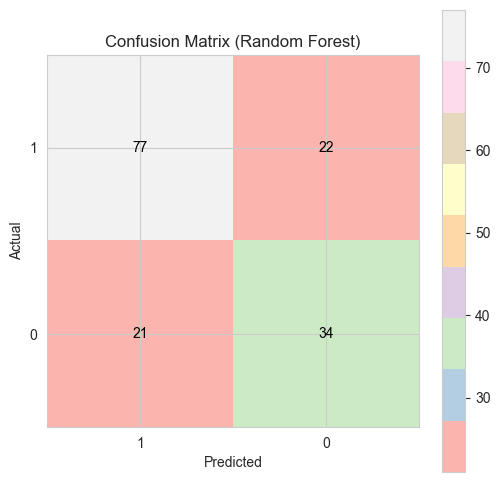

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the "diabetes_data.csv" dataset
diabetes = pd.read_csv('C:\\Users\\Dell\\Desktop\\diabetes.csv')

# Columns with 'Yes' and 'No' values to encode
columns_to_encode = ['Pregnancies','Glucose','Insulin','BMI','BloodPressure','Age','SkinThickness' ]

# Perform label encoding for relevant columns
label_encoder = LabelEncoder()
for column in columns_to_encode:
    diabetes[column] = label_encoder.fit_transform(diabetes[column])

# Perform label encoding for the 'Gender' column
diabetes['Age'] = label_encoder.fit_transform(diabetes['Age'])

# Assuming 'glucose' is the target variable, you can prepare the data as follows:
# Split data into features (X) and target variable (y)
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier (you can choose other algorithms)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Create a new figure for the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Pastel1', interpolation='nearest')
plt.title('Confusion Matrix (Random Forest)')
plt.colorbar()
tick_marks = range(len(conf_matrix))
plt.xticks(tick_marks, ["1", "0"])
plt.yticks(tick_marks, ["1", "0"])

# Annotate the confusion matrix
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, str(conf_matrix[i][j]), ha='center', va='center', color='black')

plt.xlabel('Predicted')
plt.ylabel('Actual')

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep) 

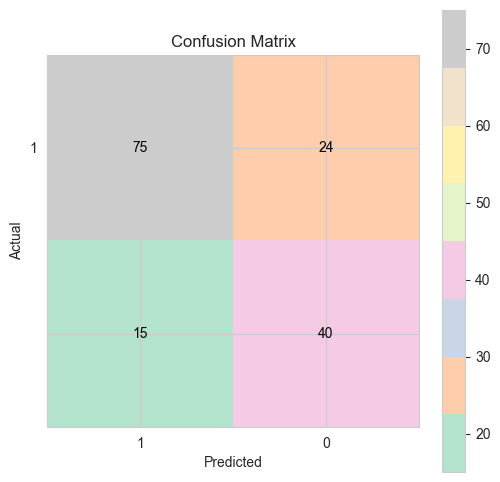

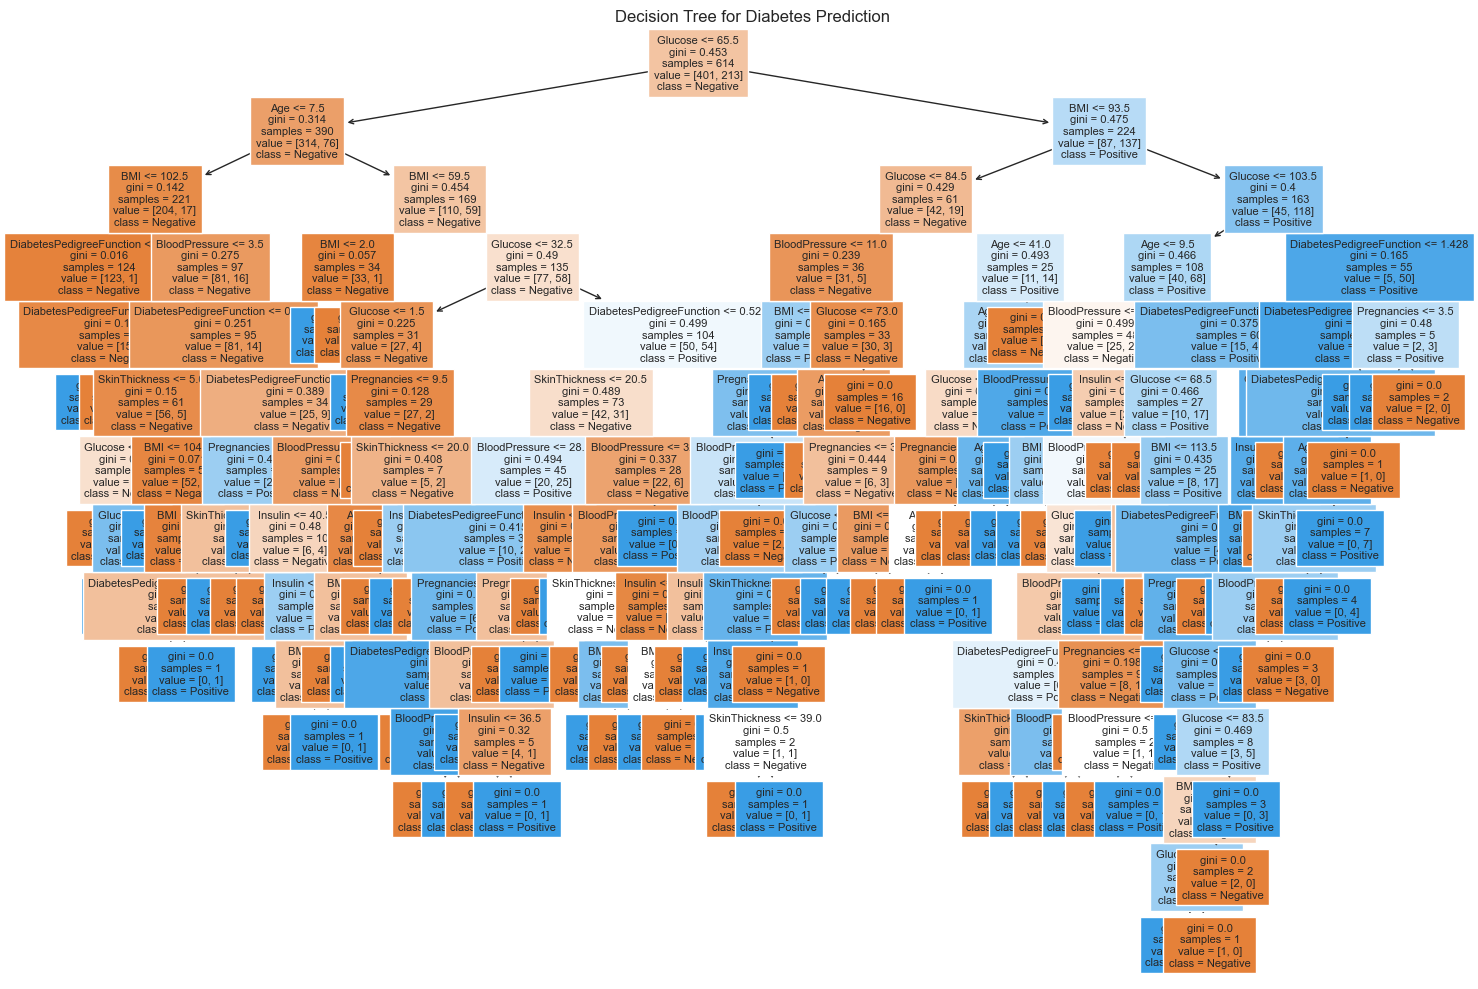

Accuracy: 0.7467532467532467
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the "diabetes_data.csv" dataset
diabetes = pd.read_csv('C:\\Users\\Dell\\Desktop\\diabetes.csv')

# Columns with 'Yes' and 'No' values to encode
columns_to_encode = ['Pregnancies','Glucose','Insulin','BMI','BloodPressure','Age','SkinThickness']

# Perform label encoding for relevant columns
label_encoder = LabelEncoder()
for column in columns_to_encode:
    diabetes[column] = label_encoder.fit_transform(diabetes[column])

# Perform label encoding for the 'Gender' column
diabetes['Age'] = label_encoder.fit_transform(diabetes['Age'])

# Assuming 'outcome' is the target variable, you can prepare the data as follows:
# Split data into features (X) and target variable (y)
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Create a new figure for the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Pastel2', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(conf_matrix))
plt.xticks(tick_marks, ["1", "0"])
plt.yticks(tick_marks, ["1", ""])

# Annotate the confusion matrix
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, str(conf_matrix[i][j]), ha='center', va='center', color='black')

plt.xlabel('Predicted')
plt.ylabel('Actual')

# Create a new figure for the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Negative", "Positive"], fontsize=8)
plt.title("Decision Tree for Diabetes Prediction")

plt.tight_layout()
plt.show()

# Print classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
